In [1]:
# Add project's path to system path
import os
import sys
try: 
    proj_path
except NameError:
    os.chdir('../')
    proj_path = os.getcwd()
    if proj_path not in sys.path:
        sys.path.append(proj_path)

# Import dependencies
import numpy as np
import matplotlib.pyplot as plt
import random
import networkx as nx
from scipy import linalg

from codebase import utils, rewiring, rewiring_iterations, directed_modularity # custom-made functions

In [ ]:
mean_variable_diverg
meanVariableDiverg

## Functions

In [2]:
def convert_from_adj2networkX(A,weight_d='binary'):

    edges_ind = np.where(A>0)
    num_edges = len(edges_ind[0])

    G = nx.DiGraph()   # DiGraph
    G.add_nodes_from(np.arange(A.shape[0]))

    edges_list = list()
    if weight_d == 'binary':
        for ind in np.arange(num_edges):
            edge_pair = (edges_ind[1][ind],edges_ind[0][ind])
            edges_list.append(edge_pair)
        
        G.add_edges_from(edges_list)    
    else:
        for ind in np.arange(num_edges):
            edge_pair_w = (edges_ind[1][ind],edges_ind[0][ind],A[edges_ind[0][ind],edges_ind[1][ind]])
            edges_list.append(edge_pair_w)    
        
        G.add_weighted_edges_from(edges_list)
        
        
    return G

In [3]:
def get_inv_path_length(G):

    nodes = len(G.nodes)
    total_connections = nodes*(nodes-1)

    paths = dict(nx.all_pairs_dijkstra_path(G))
    len_paths = dict(nx.all_pairs_dijkstra_path_length(G))

    total_inv_path_len = 0
    counter = 0
    for edge in len_paths.keys():
        for conn_edge in len_paths[edge].keys():
        
            counter += 1
            len_p = len_paths[edge][conn_edge]
            if len_p>0:
                total_inv_path_len += 1/len_p
            #else:
            #    print('edge is '+str(edge)+' and connected edge is '+str(conn_edge))

            #print('%d-%d: %f'%(edge,conn_edge,len_p))
            #print('counter is %d, length of the path is %f and total path length so far is %f '%(counter,len_p,total_path_len))
            #print('')

    average_inv_path_len = total_inv_path_len/total_connections
    num_of_possible_paths = counter
    #print('average path length is %f'%average_path_len)
    return average_inv_path_len,num_of_possible_paths
    #CHANGE SO THAT YOU INCLUDE THE DISCONNECTED NODES TOO. DO EFFICIENCY

## Supplementary Figure 3

In [4]:
directory_load = 'data/'
file_path_load = directory_load +'A_cons_adv_diff_p.pckl'
A = utils.load_var(file_path_load)


taus = [1]
p_adv_vec = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
repetitions = 100

In [5]:
path_lens = np.zeros((repetitions,len(p_adv_vec)))
possible_pathsAll = np.zeros((repetitions,len(p_adv_vec)))

for rep in np.arange(repetitions):
    for indP,p in enumerate(p_adv_vec):
        
        Ax = A[rep+1][p,1][4000]
        G = convert_from_adj2networkX(Ax)
        (average_inv_path_len,num_of_possible_paths) = get_inv_path_length(G)
        path_lens[rep,indP] = 1/average_inv_path_len
        possible_pathsAll[rep,indP] = num_of_possible_paths
        #print('ave inverse path length is '+str(average_inv_path_len)+' and number of possible paths '+str(num_of_possible_paths))
        #print('average path is '+str(path_lens[rep,indP]))
        #print('')


Text(0,0.5,'Path length')

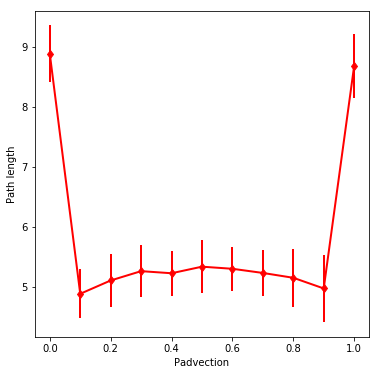

In [6]:
path_lens_std = np.std(path_lens, axis=0)
path_lens_mean = np.mean(path_lens, axis=0)

plt.rcParams['figure.figsize'] = [6, 6]

plt.errorbar(p_adv_vec, path_lens_mean, path_lens_std, marker = 'd',color = 'r',linewidth=2)

plt.xlabel('Padvection')
plt.ylabel('Path length')


Text(0,0.5,'Number of pairs with a path')

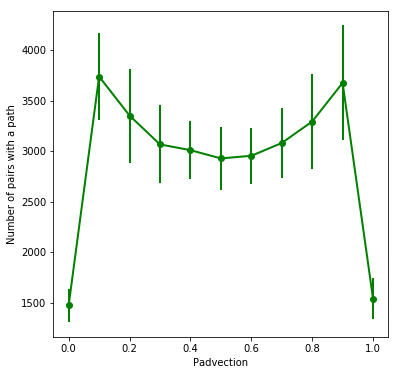

In [7]:
path_std = np.std(possible_pathsAll, axis=0)
path_mean = np.mean(possible_pathsAll, axis=0)

plt.rcParams['figure.figsize'] = [6, 6]

plt.errorbar(p_adv_vec, path_mean, path_std, marker = 'o',color = 'g',linewidth=2)

plt.xlabel('Padvection')
plt.ylabel('Number of pairs with a path')


## Supplementary Figure 4

In [8]:
tau = 1
p_adv = 0.5
p_rnd_vec = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

n_rewirings_vec = [500, 1000, 2000, 4000,8000]
repetitions = 100

In [9]:
directory_load = 'data/'
A = {}
file_path_load = directory_load +'A_cons_adv_50_pRand.pckl'
A = utils.load_var(file_path_load)

In [10]:
path_lens = np.zeros((repetitions,len(p_rnd_vec)))
possible_pathsAll = np.zeros((repetitions,len(p_rnd_vec)))


for rep in np.arange(repetitions):
    for indP,p in enumerate(p_rnd_vec):
        
        Ax = A[rep+1][p,1][4000]
        G = convert_from_adj2networkX(Ax)
        (average_inv_path_len,num_of_possible_paths) = get_inv_path_length(G)
        path_lens[rep,indP] = 1/average_inv_path_len
        possible_pathsAll[rep,indP] = num_of_possible_paths
        print('ave inverse path length is '+str(average_inv_path_len)+' and number of possible paths '+str(num_of_possible_paths))
        print('average path is '+str(path_lens[rep,indP]))
        print('')


ave inverse path length is 0.18974747474747475 and number of possible paths 2945
average path is 5.2701623635879695

ave inverse path length is 0.14648701298701222 and number of possible paths 2462
average path is 6.826543729775292

ave inverse path length is 0.19772377173891995 and number of possible paths 5174
average path is 5.057560814288068

ave inverse path length is 0.26719738510647617 and number of possible paths 7364
average path is 3.742551595710817

ave inverse path length is 0.33909547859547945 and number of possible paths 9022
average path is 2.949021921914034

ave inverse path length is 0.3791618566618674 and number of possible paths 9706
average path is 2.637396094649335

ave inverse path length is 0.4018686868687008 and number of possible paths 9901
average path is 2.488375015709352

ave inverse path length is 0.44265993265994924 and number of possible paths 10000
average path is 2.259070510382512

ave inverse path length is 0.4623265993266135 and number of possible pat

ave inverse path length is 0.40490331890333675 and number of possible paths 9803
average path is 2.4697253722406054

ave inverse path length is 0.4321077441077584 and number of possible paths 9901
average path is 2.314237626231067

ave inverse path length is 0.4603316498316605 and number of possible paths 10000
average path is 2.172346829434152

ave inverse path length is 0.471829966329977 and number of possible paths 10000
average path is 2.119407564929109

ave inverse path length is 0.47999158249158463 and number of possible paths 10000
average path is 2.0833698682987474

ave inverse path length is 0.18843434343434343 and number of possible paths 2919
average path is 5.306888233717502

ave inverse path length is 0.1599258858425527 and number of possible paths 3079
average path is 6.252896425938835

ave inverse path length is 0.26140139490139325 and number of possible paths 7699
average path is 3.8255342913423376

ave inverse path length is 0.24699957365866643 and number of possible p

ave inverse path length is 0.19609824434824502 and number of possible paths 4323
average path is 5.099484716569568

ave inverse path length is 0.16950601250601233 and number of possible paths 3281
average path is 5.899495747766058

ave inverse path length is 0.24861046501198067 and number of possible paths 7456
average path is 4.022356822154729

ave inverse path length is 0.3473738576238681 and number of possible paths 8852
average path is 2.8787428243457143

ave inverse path length is 0.36362950937951816 and number of possible paths 9511
average path is 2.750051836294467

ave inverse path length is 0.42855892255893985 and number of possible paths 10000
average path is 2.3334014236104714

ave inverse path length is 0.4409814814814967 and number of possible paths 10000
average path is 2.2676689203375524

ave inverse path length is 0.45922053872054885 and number of possible paths 10000
average path is 2.17760295039533

ave inverse path length is 0.4731599326599378 and number of possible 

ave inverse path length is 0.43589393939395493 and number of possible paths 9705
average path is 2.2941360492195644

ave inverse path length is 0.46433838383839493 and number of possible paths 10000
average path is 2.1536018447013268

ave inverse path length is 0.4712912457912562 and number of possible paths 10000
average path is 2.121830203574201

ave inverse path length is 0.48089225589226053 and number of possible paths 10000
average path is 2.0794678802730413

ave inverse path length is 0.1806060606060606 and number of possible paths 2764
average path is 5.5369127516778525

ave inverse path length is 0.18445791245791163 and number of possible paths 3362
average path is 5.421290887850492

ave inverse path length is 0.18910365560365536 and number of possible paths 4264
average path is 5.288105070247357

ave inverse path length is 0.29379348681621525 and number of possible paths 7867
average path is 3.403751427020428

ave inverse path length is 0.31042982858892026 and number of possib

ave inverse path length is 0.20753094436427494 and number of possible paths 4472
average path is 4.818558519372995

ave inverse path length is 0.2370952380952375 and number of possible paths 5605
average path is 4.217714400482035

ave inverse path length is 0.2974615199615122 and number of possible paths 7784
average path is 3.36177936604838

ave inverse path length is 0.3355766394099745 and number of possible paths 9229
average path is 2.9799452123909567

ave inverse path length is 0.4013403078403302 and number of possible paths 9605
average path is 2.4916510514011003

ave inverse path length is 0.4162424242424465 and number of possible paths 9901
average path is 2.402446126965509

ave inverse path length is 0.4288181818181988 and number of possible paths 9706
average path is 2.3319906720372194

ave inverse path length is 0.462641414141425 and number of possible paths 10000
average path is 2.1615012608756845

ave inverse path length is 0.47308754208754705 and number of possible paths 

ave inverse path length is 0.4384831649831805 and number of possible paths 9901
average path is 2.2805892674086095

ave inverse path length is 0.4593232323232418 and number of possible paths 10000
average path is 2.177116090867063

ave inverse path length is 0.47033670033670566 and number of possible paths 10000
average path is 2.1261364449853004

ave inverse path length is 0.48015151515151816 and number of possible paths 10000
average path is 2.082675923004089

ave inverse path length is 0.19348484848484848 and number of possible paths 3019
average path is 5.168363351605325

ave inverse path length is 0.15193602693602629 and number of possible paths 2462
average path is 6.5817174515235735

ave inverse path length is 0.15898314676344935 and number of possible paths 3059
average path is 6.289974883236509

ave inverse path length is 0.23696463760211248 and number of possible paths 6762
average path is 4.220038948086004

ave inverse path length is 0.3579472101972159 and number of possible

ave inverse path length is 0.30851226551226374 and number of possible paths 7691
average path is 3.2413622140421796

ave inverse path length is 0.3969812409812638 and number of possible paths 9802
average path is 2.5190107157914716

ave inverse path length is 0.4118299663299867 and number of possible paths 9608
average path is 2.428186586108527

ave inverse path length is 0.4440084175084336 and number of possible paths 9901
average path is 2.25220955407001

ave inverse path length is 0.4586010101010206 and number of possible paths 10000
average path is 2.180544695659785

ave inverse path length is 0.47296464646465375 and number of possible paths 10000
average path is 2.114322936132465

ave inverse path length is 0.4765656565656598 and number of possible paths 9901
average path is 2.098346757100452

ave inverse path length is 0.19707070707070712 and number of possible paths 3115
average path is 5.074320861096872

ave inverse path length is 0.21565079365079498 and number of possible path

ave inverse path length is 0.4742710437710496 and number of possible paths 10000
average path is 2.1084989546246504

ave inverse path length is 0.4796885521885556 and number of possible paths 10000
average path is 2.0846859810131986

ave inverse path length is 0.18997474747474674 and number of possible paths 3037
average path is 5.263857503655477

ave inverse path length is 0.21313973063972896 and number of possible paths 4111
average path is 4.691757829469647

ave inverse path length is 0.23972280525310907 and number of possible paths 6707
average path is 4.17148464012074

ave inverse path length is 0.29418446368446494 and number of possible paths 7944
average path is 3.399227775238925

ave inverse path length is 0.31345723104056694 and number of possible paths 8749
average path is 3.190227887486769

ave inverse path length is 0.3669160654160748 and number of possible paths 9224
average path is 2.7254189561474282

ave inverse path length is 0.4248451178451366 and number of possible pa

ave inverse path length is 0.33183766233766593 and number of possible paths 8942
average path is 3.013521711054113

ave inverse path length is 0.3349890973224327 and number of possible paths 9319
average path is 2.9851717801952313

ave inverse path length is 0.3624482924482974 and number of possible paths 9324
average path is 2.7590142396453645

ave inverse path length is 0.4195863395863563 and number of possible paths 10000
average path is 2.383299706529619

ave inverse path length is 0.44144949494951136 and number of possible paths 10000
average path is 2.2652647957256584

ave inverse path length is 0.45930303030304276 and number of possible paths 10000
average path is 2.1772118493104906

ave inverse path length is 0.4721700336700387 and number of possible paths 10000
average path is 2.117881120551625

ave inverse path length is 0.4807407407407449 and number of possible paths 10000
average path is 2.0801232665639264

ave inverse path length is 0.19252525252525252 and number of possib

ave inverse path length is 0.46946632996633597 and number of possible paths 10000
average path is 2.130078210447397

ave inverse path length is 0.4793939393939416 and number of possible paths 10000
average path is 2.0859671302149083

ave inverse path length is 0.17792929292929294 and number of possible paths 2711
average path is 5.620210048254329

ave inverse path length is 0.1542755731922408 and number of possible paths 3152
average path is 6.48190753278818

ave inverse path length is 0.19756156806156513 and number of possible paths 4117
average path is 5.061713215843554

ave inverse path length is 0.2504092512425834 and number of possible paths 6522
average path is 3.993462681741148

ave inverse path length is 0.316601210517881 and number of possible paths 8754
average path is 3.158547620093582

ave inverse path length is 0.34558253166586966 and number of possible paths 8860
average path is 2.8936647786551353

ave inverse path length is 0.4004849687349823 and number of possible paths

ave inverse path length is 0.3626829004329124 and number of possible paths 9036
average path is 2.7572295214534823

ave inverse path length is 0.40606661856663867 and number of possible paths 9607
average path is 2.462650102906433

ave inverse path length is 0.4427727272727424 and number of possible paths 9901
average path is 2.25849502104499

ave inverse path length is 0.4614107744107888 and number of possible paths 10000
average path is 2.1672662526725293

ave inverse path length is 0.47231818181819024 and number of possible paths 10000
average path is 2.1172168222499863

ave inverse path length is 0.4796801346801452 and number of possible paths 10000
average path is 2.084722563436588

ave inverse path length is 0.21126262626262626 and number of possible paths 3371
average path is 4.73344489600765

ave inverse path length is 0.20922727272727043 and number of possible paths 4349
average path is 4.7794916358896895

ave inverse path length is 0.24978246753246588 and number of possible p

ave inverse path length is 0.1888437950937949 and number of possible paths 4131
average path is 5.295381823391763

ave inverse path length is 0.2614282106782122 and number of possible paths 6681
average path is 3.8251418904093866

ave inverse path length is 0.3329829645662937 and number of possible paths 9225
average path is 3.003156636864255

ave inverse path length is 0.3730101010101065 and number of possible paths 9607
average path is 2.6808925476602723

ave inverse path length is 0.4078306878307064 and number of possible paths 9705
average path is 2.45199792423445

ave inverse path length is 0.43206902356904425 and number of possible paths 9705
average path is 2.3144450202415423

ave inverse path length is 0.4600370370370437 and number of possible paths 10000
average path is 2.173738024313631

ave inverse path length is 0.47279461279461965 and number of possible paths 10000
average path is 2.115083321464148

ave inverse path length is 0.4789478114478153 and number of possible paths

ave inverse path length is 0.4625707070707148 and number of possible paths 10000
average path is 2.16183166100729

ave inverse path length is 0.4742929292929341 and number of possible paths 10000
average path is 2.108401661164924

ave inverse path length is 0.48015151515151866 and number of possible paths 10000
average path is 2.082675923004087

ave inverse path length is 0.17949494949494949 and number of possible paths 2742
average path is 5.571187394485087

ave inverse path length is 0.21690183581850186 and number of possible paths 5216
average path is 4.610380526409078

ave inverse path length is 0.24396519978338269 and number of possible paths 6466
average path is 4.098945263045313

ave inverse path length is 0.27577793811127244 and number of possible paths 7352
average path is 3.626105869268318

ave inverse path length is 0.3413882475549169 and number of possible paths 9041
average path is 2.929216243271926

ave inverse path length is 0.3569190716690764 and number of possible path

ave inverse path length is 0.19751011306314128 and number of possible paths 5016
average path is 5.063031884753737

ave inverse path length is 0.30221055796055807 and number of possible paths 8756
average path is 3.308951238330037

ave inverse path length is 0.3230951579284934 and number of possible paths 8755
average path is 3.0950634061229647

ave inverse path length is 0.37795983645984477 and number of possible paths 9608
average path is 2.6457837673084135

ave inverse path length is 0.39968542568544296 and number of possible paths 9803
average path is 2.5019676368860435

ave inverse path length is 0.4440202020202155 and number of possible paths 10000
average path is 2.252149779334751

ave inverse path length is 0.45956397306398417 and number of possible paths 10000
average path is 2.1759756173506055

ave inverse path length is 0.4715235690235723 and number of possible paths 10000
average path is 2.1207847617687343

ave inverse path length is 0.4787962962962993 and number of possibl

ave inverse path length is 0.4569612794612888 and number of possible paths 10000
average path is 2.1883692228341514

ave inverse path length is 0.4735606060606121 and number of possible paths 10000
average path is 2.1116621340585238

ave inverse path length is 0.479006734006738 and number of possible paths 10000
average path is 2.087653323023917

ave inverse path length is 0.2021212121212124 and number of possible paths 3229
average path is 4.9475262368815525

ave inverse path length is 0.16316594516594424 and number of possible paths 2812
average path is 6.128729858322903

ave inverse path length is 0.20044737053070205 and number of possible paths 4519
average path is 4.988840698445742

ave inverse path length is 0.2186271481044211 and number of possible paths 5188
average path is 4.573997367986423

ave inverse path length is 0.2699908609908607 and number of possible paths 7376
average path is 3.7038290715842055

ave inverse path length is 0.3722503607503701 and number of possible pat

ave inverse path length is 0.3015734728234745 and number of possible paths 7964
average path is 3.3159415204444995

ave inverse path length is 0.3818335738335869 and number of possible paths 9507
average path is 2.6189420431526176

ave inverse path length is 0.41411207311209575 and number of possible paths 9606
average path is 2.4148052301032785

ave inverse path length is 0.4426346801346969 and number of possible paths 10000
average path is 2.2591993914613577

ave inverse path length is 0.4617828282828366 and number of possible paths 10000
average path is 2.165520107619748

ave inverse path length is 0.4758922558922601 and number of possible paths 10000
average path is 2.1013159756615067

ave inverse path length is 0.4807407407407456 and number of possible paths 10000
average path is 2.0801232665639238

ave inverse path length is 0.2087878787878788 and number of possible paths 3322
average path is 4.78955007256894

ave inverse path length is 0.15998316498316412 and number of possible 

Text(0,0.5,'Path length')

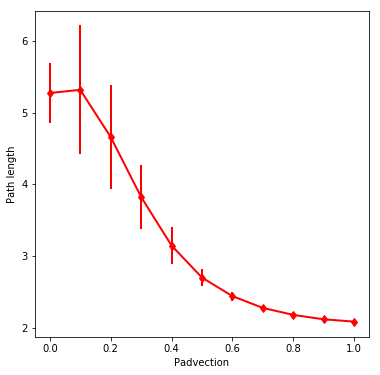

In [11]:
path_lens_std = np.std(path_lens, axis=0)
path_lens_mean = np.mean(path_lens, axis=0)

plt.rcParams['figure.figsize'] = [6, 6]

plt.errorbar(p_rnd_vec, path_lens_mean, path_lens_std, marker = 'd',color = 'r',linewidth=2)

plt.xlabel('Padvection')
plt.ylabel('Path length')

Text(0,0.5,'Number of pairs with a path')

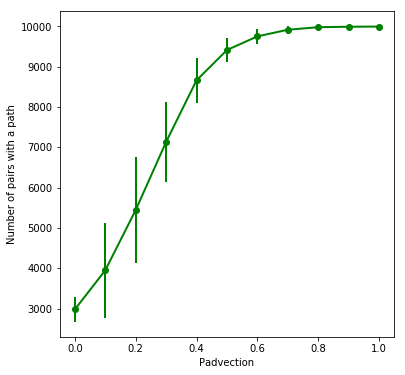

In [12]:
path_std = np.std(possible_pathsAll, axis=0)
path_mean = np.mean(possible_pathsAll, axis=0)
plt.rcParams['figure.figsize'] = [6, 6]

plt.errorbar(p_rnd_vec, path_mean, path_std, marker = 'o',color = 'g',linewidth=2)

plt.xlabel('Padvection')
plt.ylabel('Number of pairs with a path')